# KNN

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import numpy as np
import csv

In [7]:
cur_path = '/Users/sonalichaudhari/Desktop/ADS_Project/Data'
df = pd.read_csv(open(cur_path+'/Data_for_Prediction.csv','rU'), encoding='utf-8')

In [8]:
df.shape

(1606792, 18)

In [9]:
df.columns

Index(['Year', 'Day', 'Month', 'Week', 'Origin', 'Dest', 'UniqueCarrier',
       'CRSElapsedTime', 'Distance', 'OriginVisibility', 'OriginWind',
       'OriginPrecip', 'CRSDep_hour', 'CRSDep_min', 'CRSArr_hour',
       'CRSArr_min', 'Flight_Status', 'DepDelayMinutes'],
      dtype='object')

In [29]:
cols = df.columns.tolist()
cols.remove('Flight_Status')

In [30]:
df = df[cols]

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.ix[:, df.columns != 'DepDelayMinutes'], 
                                            df['DepDelayMinutes'], 
                                            test_size=0.30)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, neighbors

In [38]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Converting the categorical data to numeric 
X_train['carrier'] = label_encoder.fit_transform(X_train['UniqueCarrier'])
X_train['origin'] = label_encoder.fit_transform(X_train['Origin'])
X_train['dest'] = label_encoder.fit_transform(X_train['Dest'])

X_test['carrier'] = label_encoder.fit_transform(X_test['UniqueCarrier'])
X_test['origin'] = label_encoder.fit_transform(X_test['Origin'])
X_test['dest'] = label_encoder.fit_transform(X_test['Dest'])

X_train = X_train._get_numeric_data()
X_test = X_test._get_numeric_data()

In [39]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_train, y_train) 
print(accuracy) 

#Y = Y.reshape(len(X), -1)
#prediction = clf.predict(Y)

0.224686464774


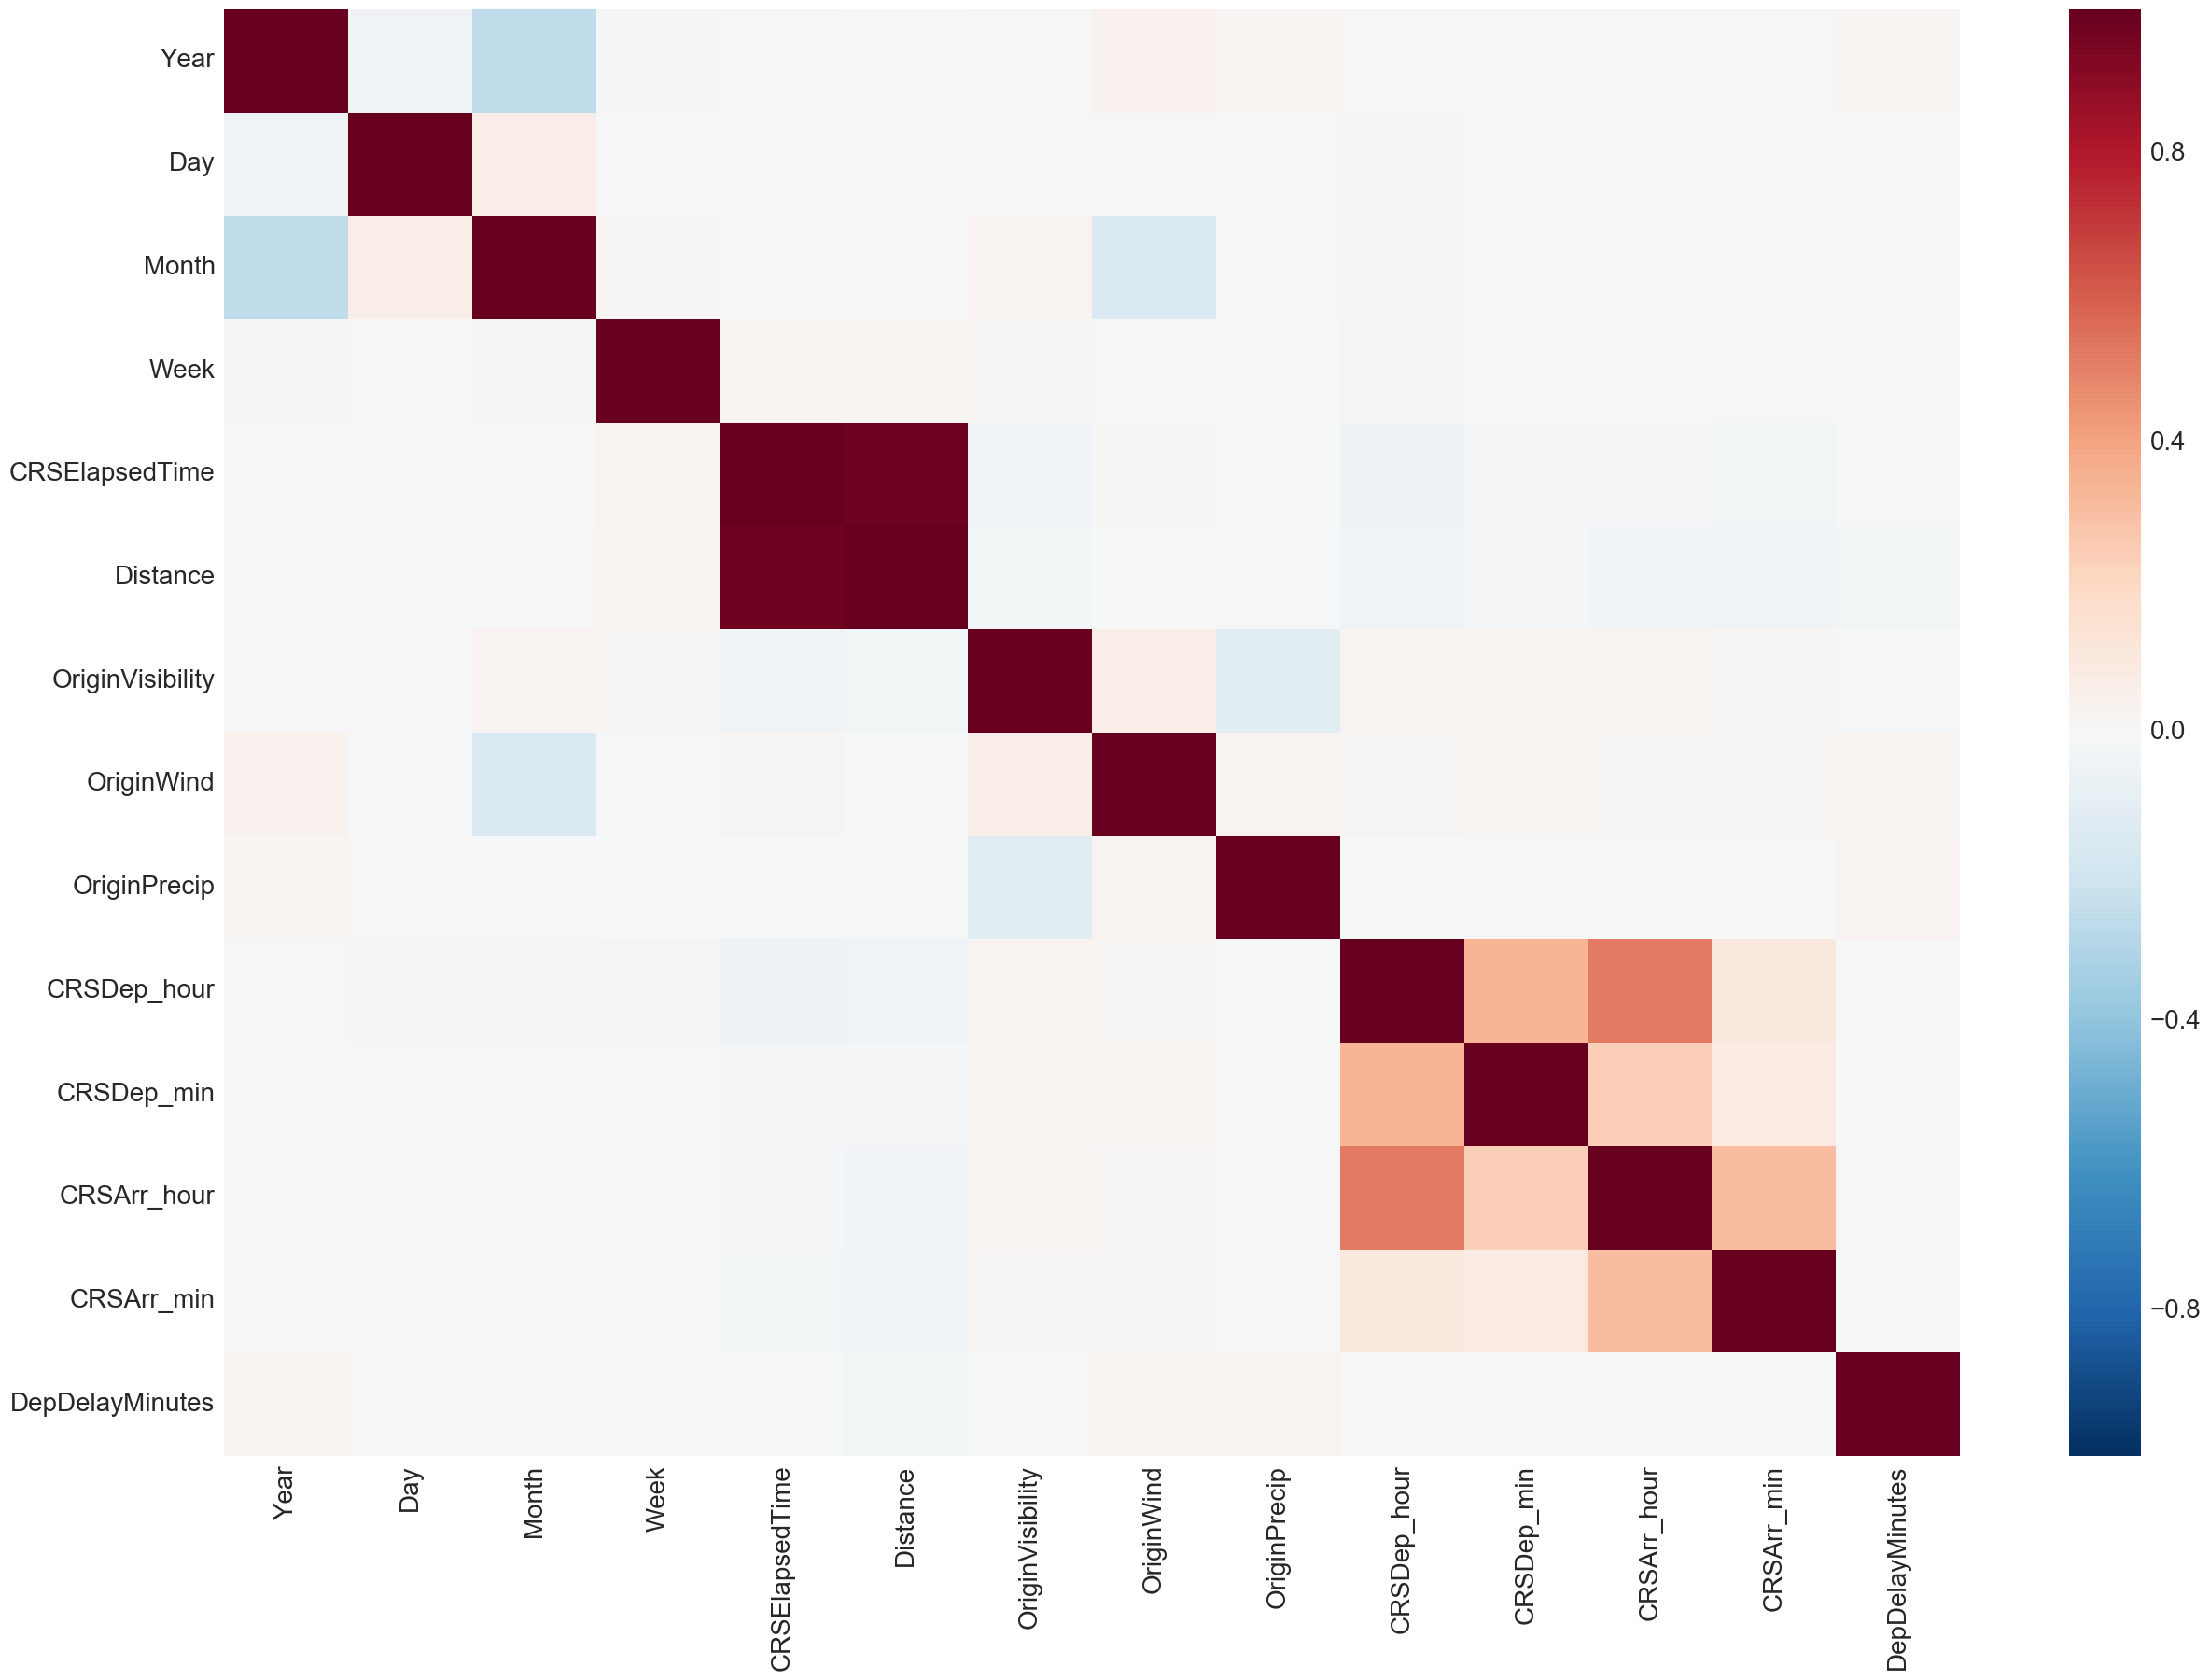

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()
plt.figure(figsize = (30,20))
sns.set(font_scale = 2)
sns.heatmap(data=df.corr())
plt.show()
plt.gcf().clear()

### Cross Validation for splitting the data in train and test sets

In [14]:
y = np.ravel(y)

In [15]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)
print(skf)  
StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [ 154474  390219  407434 ..., 1624746 1624747 1624748] TEST: [      0       1       2 ..., 1557799 1570768 1580993]
TRAIN: [      0       1       2 ..., 1557799 1570768 1580993] TEST: [ 154474  390219  407434 ..., 1624746 1624747 1624748]


In [16]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Converting the categorical data to numeric 
X_train['carrier'] = label_encoder.fit_transform(X_train['UniqueCarrier'])
X_train['origin'] = label_encoder.fit_transform(X_train['Origin'])
X_train['dest'] = label_encoder.fit_transform(X_train['Dest'])

X_test['carrier'] = label_encoder.fit_transform(X_test['UniqueCarrier'])
X_test['origin'] = label_encoder.fit_transform(X_test['Origin'])
X_test['dest'] = label_encoder.fit_transform(X_test['Dest'])

In [17]:
X_train = X_train._get_numeric_data()
X_test = X_test._get_numeric_data()